In [9]:
import cPickle as pickle
import os
import numpy as np
import bob
import bob.io.base

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

%matplotlib inline
a={}


In [145]:
import random
def load_chunk(path,chunk):
    os.chdir(path)
    data=bob.io.base.HDF5File('X_traindataset'+chunk+'.hdf5')
    X_train=data.read('frame')
    del data
    initial=random.randint(0,50)
    final=random.randint(0,50)

    X_train=X_train[:,initial:initial+150,final:final+150]
    data=open('Y_traindataset'+chunk+'.pkl','r')
    y_train=pickle.load(data)
    data.close()
    return X_train,y_train


def unpickle(file):
    f = open(file, 'rb')
    dict = pickle.load(f)
    f.close()
    return dict


net = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dense', layers.DenseLayer),
            ('output', layers.DenseLayer),
            ],
    input_shape=(None, 3, 150, 150),
    conv2d1_num_filters=20,
    conv2d1_filter_size=(5, 5),
    conv2d1_stride=(1, 1),
    conv2d1_pad=(2, 2),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    maxpool1_pool_size=(2, 2),
    conv2d2_num_filters=20,
    conv2d2_filter_size=(5, 5),
    conv2d2_stride=(1, 1),
    conv2d2_pad=(2, 2),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    maxpool2_pool_size=(2, 2),
    dense_num_units=1000,
    dense_nonlinearity=lasagne.nonlinearities.rectify,
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    update=nesterov_momentum,
    update_momentum=0.9,
    update_learning_rate=0.0001,
    max_epochs=100,
    verbose=True
)

In [134]:
path="/home/bashir/major_pro/dataset/store"
print path
chunk='0'
# import random
X_train,y_train=load_chunk(path,chunk)
size=X_train.shape[0]
X_train=X_train[:size/2,:,:,:]
# initial=random.randint(0,50)
# final=random.randint(0,50)


# X=X_train[initial:initial+150,final:final+150]
# print X.shape
# ax2=plt.subplot(1,2,2)
# plt.imshow(X)
# ax1=plt.subplot(1,2,1,sharex=ax2,sharey=ax2)
# plt.imshow(X_train.astype('uint8'))

print X_train.shape

/home/bashir/major_pro/dataset/store
(6409, 150, 150, 3)


# A SAMPLE OF DATA AUGMENTATION

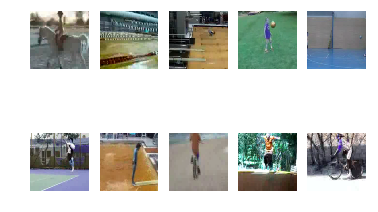

In [139]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.axis('off')
plt.show()

In [147]:
y_train=y_train[:size/2]
X_train=X_train.reshape((X_train.shape[0],X_train.shape[3],X_train.shape[1],X_train.shape[2]))
a=net.fit(X_train,y_train)

# Neural Network with 27402550 learnable parameters

## Layer information

  #  name      size
---  --------  ----------
  0  input     3x150x150
  1  conv2d1   20x150x150
  2  maxpool1  20x75x75
  3  conv2d2   20x75x75
  4  maxpool2  20x37x37
  5  dense     1000
  6  output    10



RuntimeError: BaseCorrMM: Failed to allocate output of 128 x 20 x 150 x 150
Apply node that caused the error: CorrMM{valid, (1, 1)}(IncSubtensor{InplaceSet;::, ::, int64:int64:, int64:int64:}.0, Subtensor{::, ::, ::int64, ::int64}.0)
Toposort index: 24
Inputs types: [TensorType(float64, 4D), TensorType(float64, 4D)]
Inputs shapes: [(128, 3, 154, 154), (20, 3, 5, 5)]
Inputs strides: [(569184, 189728, 1232, 8), (600, 200, -40, -8)]
Inputs values: ['not shown', 'not shown']
Outputs clients: [[Elemwise{add,no_inplace}(CorrMM{valid, (1, 1)}.0, InplaceDimShuffle{x,0,x,x}.0), Elemwise{Composite{(i0 * (Abs(i1) + i2 + i3))}}[(0, 2)](TensorConstant{(1, 1, 1, 1) of 0.5}, Elemwise{add,no_inplace}.0, CorrMM{valid, (1, 1)}.0, InplaceDimShuffle{x,0,x,x}.0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-146-76fbebca25b3>", line 2, in <module>
    a=net.fit(X_train,y_train)
  File "/home/bashir/.virtualenvs/video_classification/lib/python2.7/site-packages/nolearn/lasagne/base.py", line 527, in fit
    self.initialize()
  File "/home/bashir/.virtualenvs/video_classification/lib/python2.7/site-packages/nolearn/lasagne/base.py", line 367, in initialize
    self.y_tensor_type,
  File "/home/bashir/.virtualenvs/video_classification/lib/python2.7/site-packages/nolearn/lasagne/base.py", line 474, in _create_iter_funcs
    layers, target=y_batch, **objective_kw)
  File "/home/bashir/.virtualenvs/video_classification/lib/python2.7/site-packages/nolearn/lasagne/base.py", line 171, in objective
    output_layer, deterministic=deterministic, **get_output_kw)
  File "/home/bashir/.virtualenvs/video_classification/lib/python2.7/site-packages/lasagne/layers/helper.py", line 185, in get_output
    all_outputs[layer] = layer.get_output_for(layer_inputs, **kwargs)
  File "/home/bashir/.virtualenvs/video_classification/lib/python2.7/site-packages/lasagne/layers/conv.py", line 489, in get_output_for
    border_mode=border_mode)

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.